In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# EDA(visualization）

In [2]:
df = pd.read_csv('./data/StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


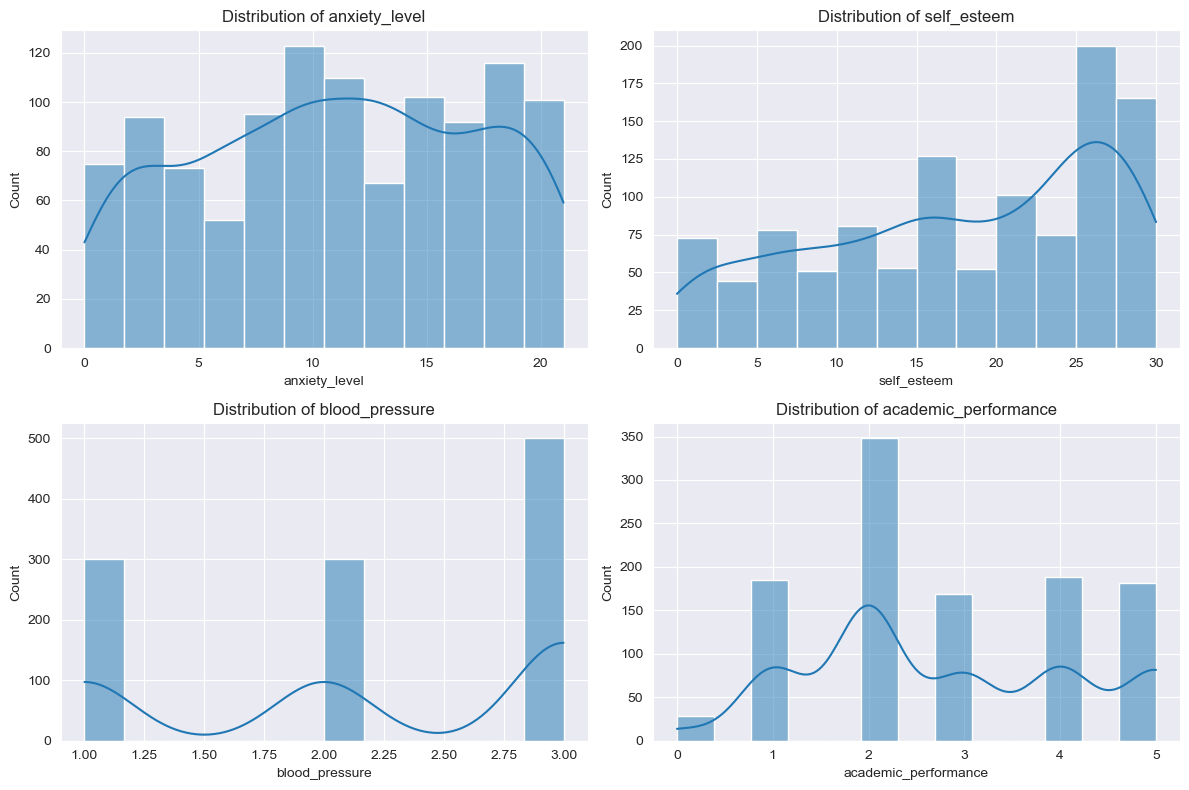

In [4]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['anxiety_level', 'self_esteem', 'blood_pressure', 'academic_performance']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

They looks like balanced.


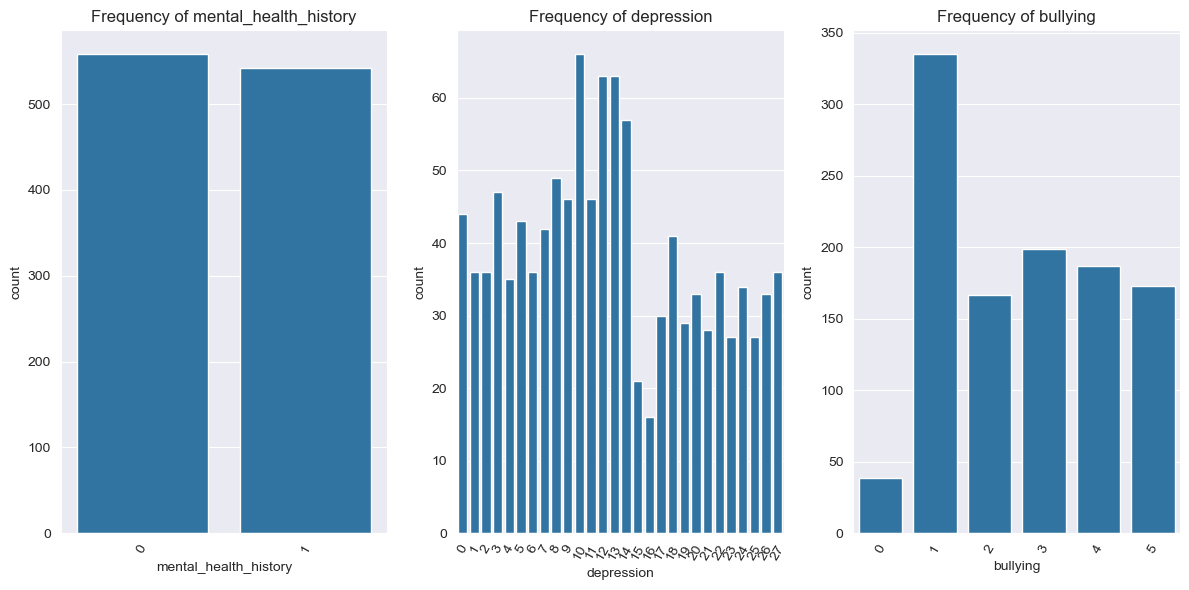

In [5]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['mental_health_history', 'depression', 'bullying']):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=column)
    plt.title(f'Frequency of {column}')
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

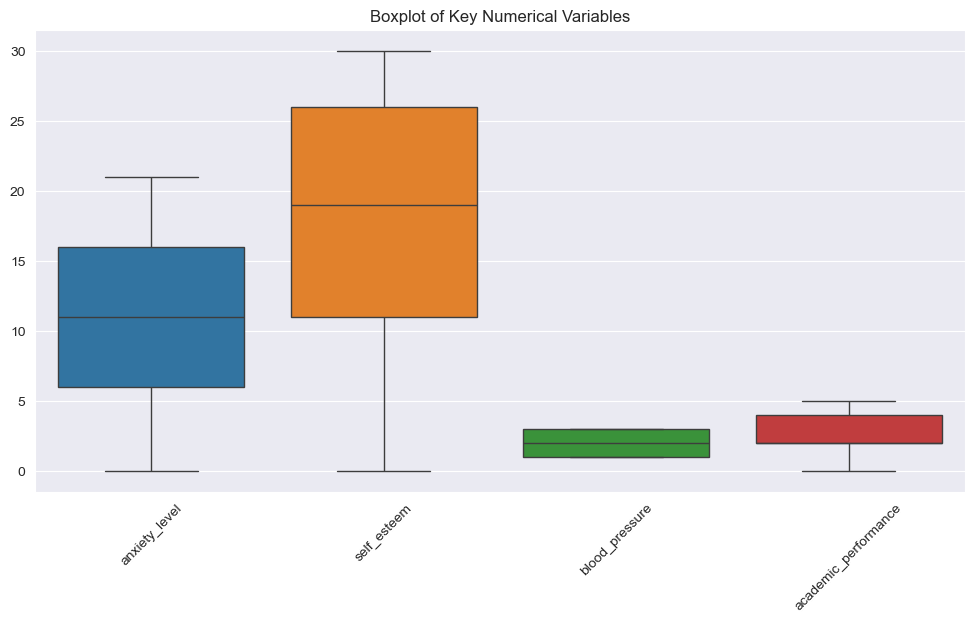

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['anxiety_level', 'self_esteem', 'blood_pressure', 'academic_performance']])
plt.title('Boxplot of Key Numerical Variables')
plt.xticks(rotation=45)
plt.show()

/var/folders/g8/p7ldthqx0y37r4s0qbng4s940000gn/T/ipykernel_28320/383156573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stress_level', palette='viridis')


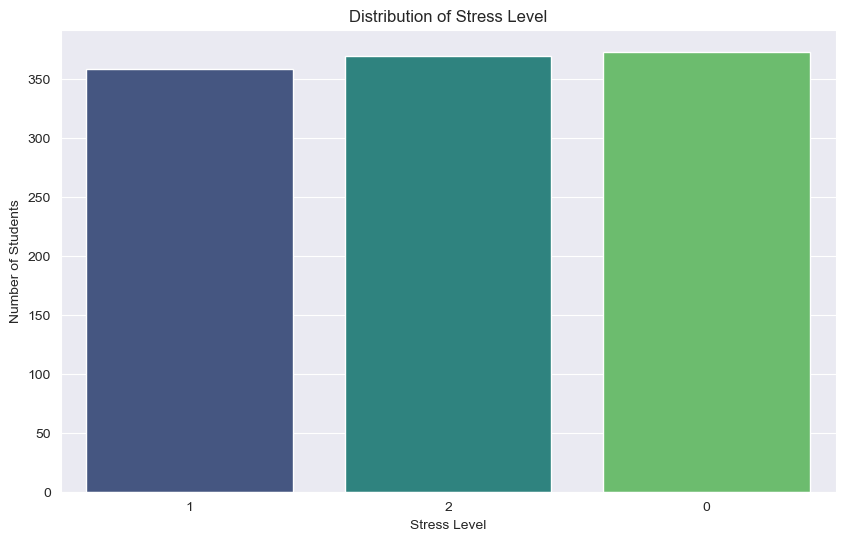

In [7]:
df['stress_level'] = df['stress_level'].astype(str)

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='stress_level', palette='viridis')

plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')

plt.show()

Stress Level which is our project's target is perfectly balanced.



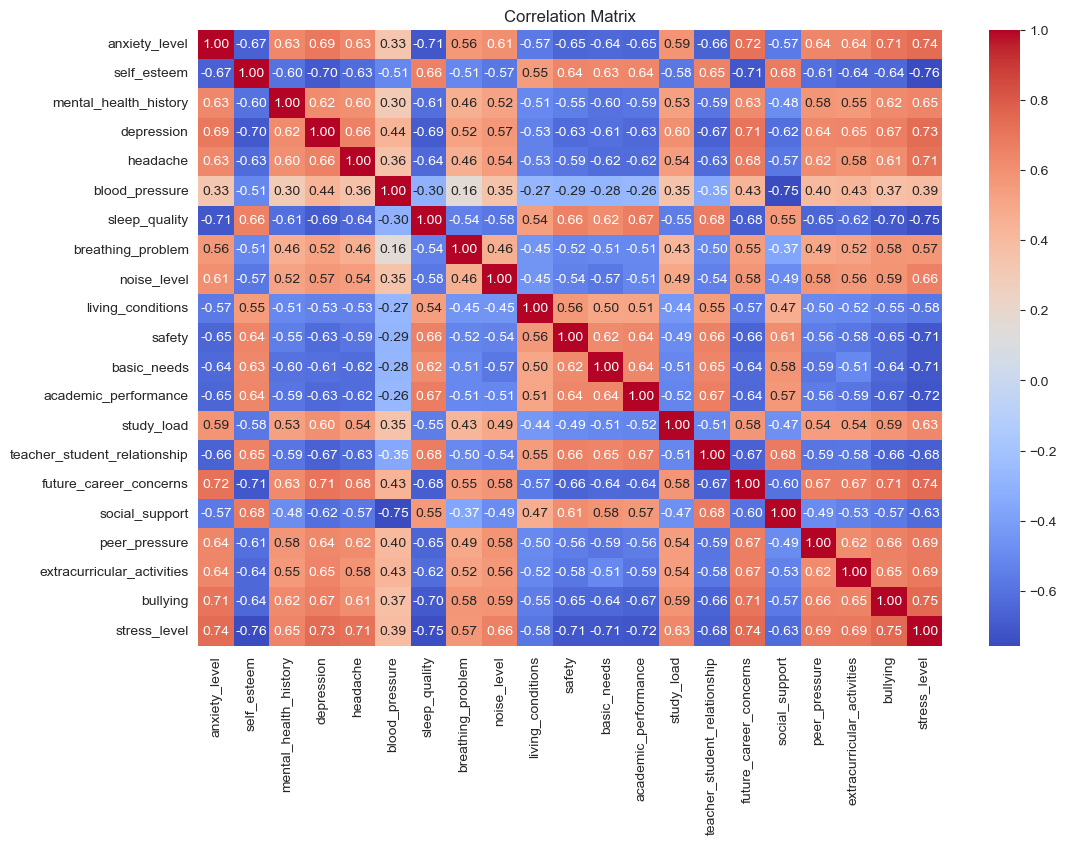

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Decision Tree(Base Model)

In [9]:
X = df.drop(columns=['stress_level'])
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

max_depth = 4
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=max_depth)


In [11]:
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67  7  2]
 [ 5 61  7]
 [ 5  6 60]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        76
           1       0.82      0.84      0.83        73
           2       0.87      0.85      0.86        71

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



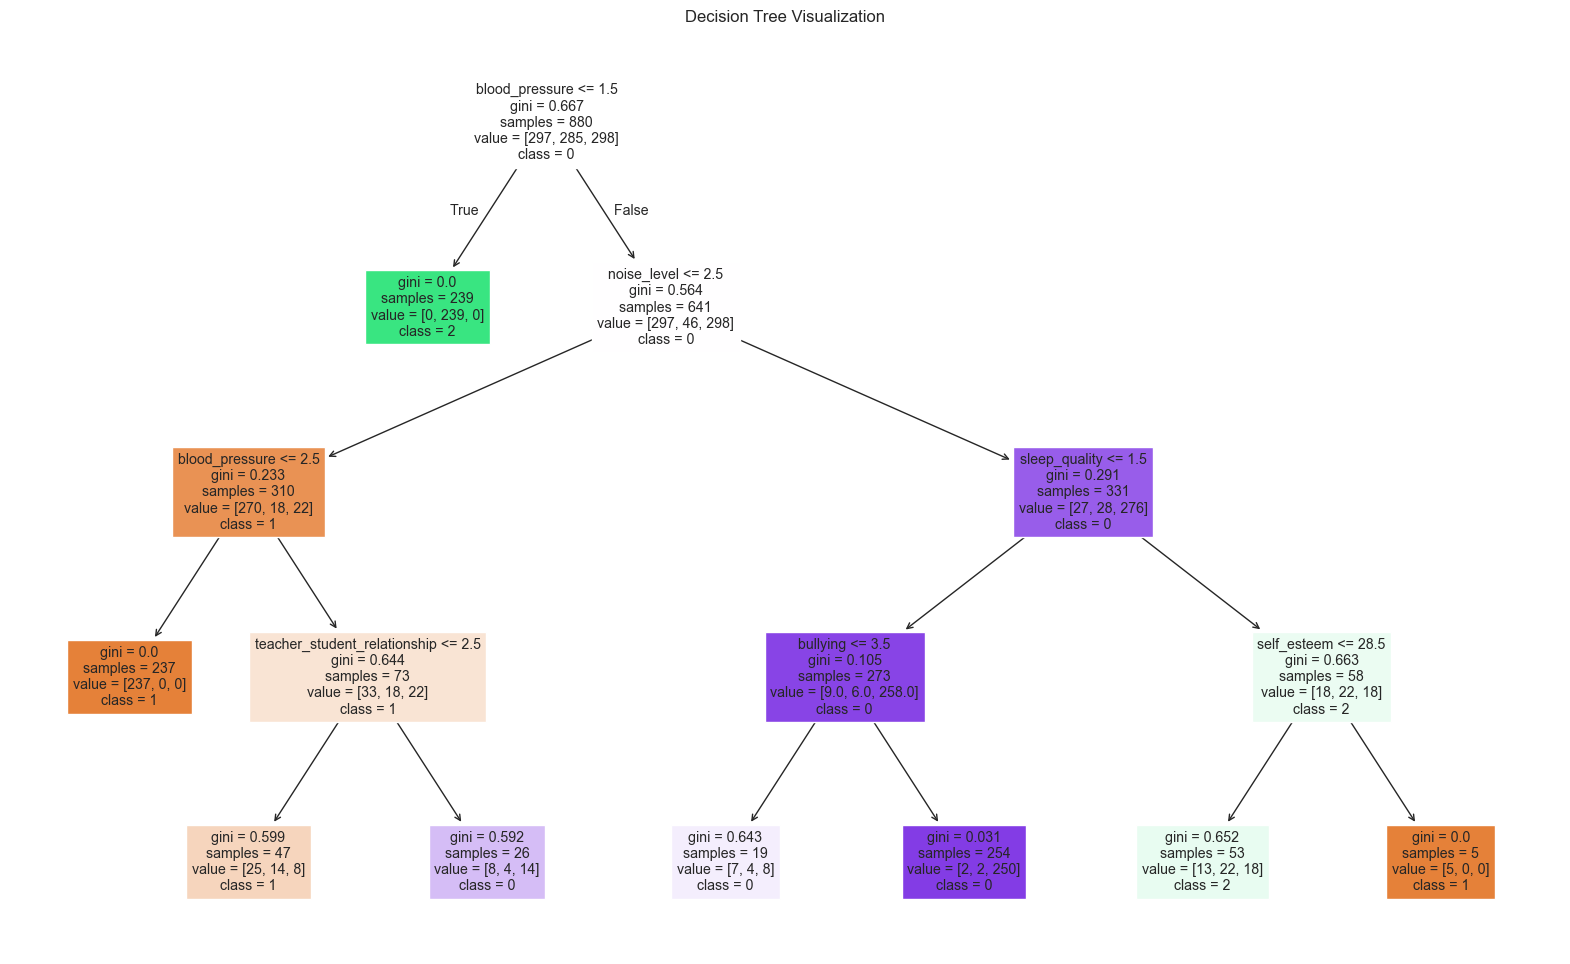

In [12]:
from sklearn import tree

plt.figure(figsize=(20, 12))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=[str(x) for x in y.unique()])
plt.title('Decision Tree Visualization')
plt.show()

# ALL vs ALL Model

In [13]:
import ALLvsALL
ALLvsALL.SVM()
ALLvsALL.LogistiRegression()
ALLvsALL.NaiveBayes()

initializing datasource successfully!
SVM Model Accuracy: 0.8954545454545455
initializing datasource successfully!
Logistic Regression Accuracy: 0.8909090909090909
initializing datasource successfully!
Bernoulli Naive Bayes Accuracy: 0.8772727272727273


/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


initializing datasource successfully!


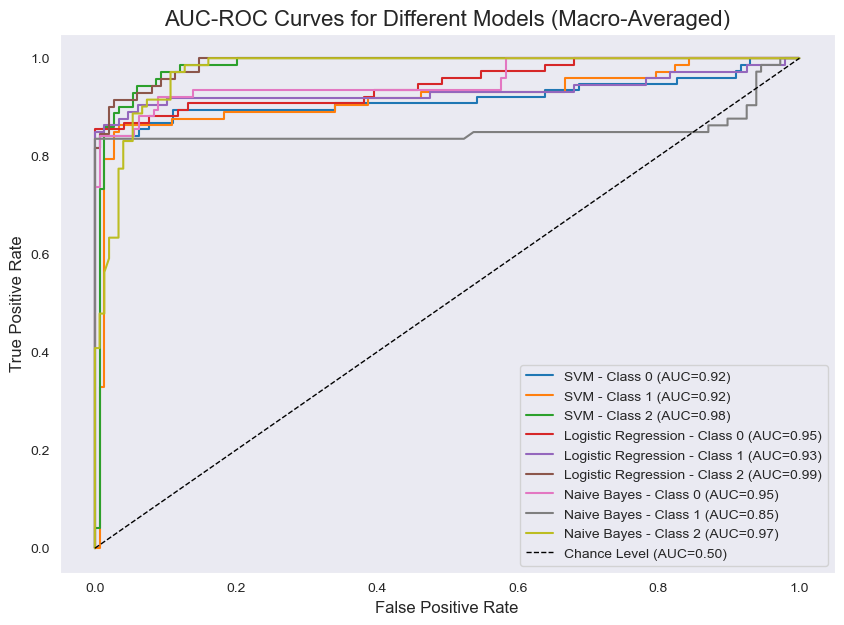

/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


initializing datasource successfully!


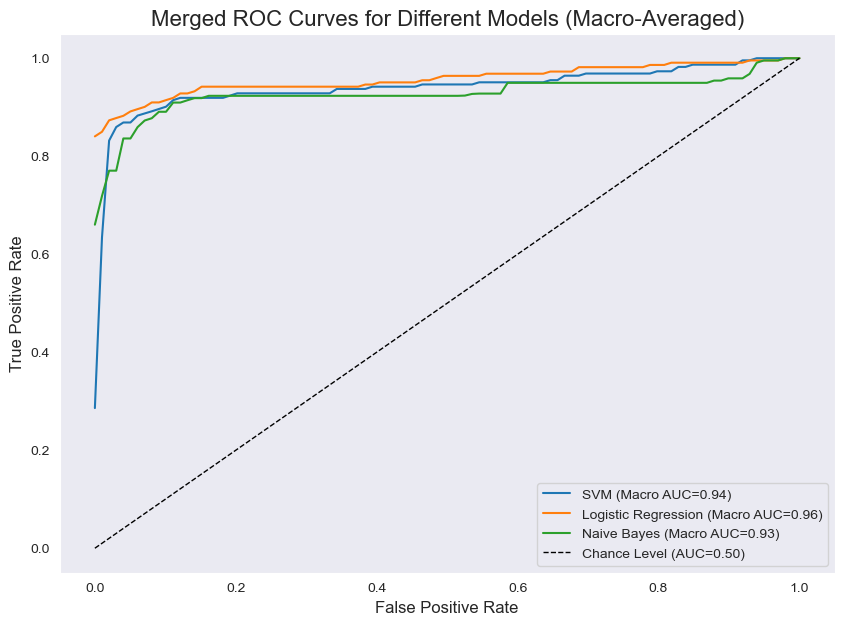

In [14]:
ALLvsALL.plot_seperate_auc_curves()
ALLvsALL.plot_merged_auc_curves()

# KNN Model

In [15]:
import KNN
KNN.KNNModel_test()

Initializing KNN model completed
initializing datasource successfully!


/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


KNN Search Accuracy: 0.8954545454545455


Initializing KNN model completed
initializing datasource successfully!


/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


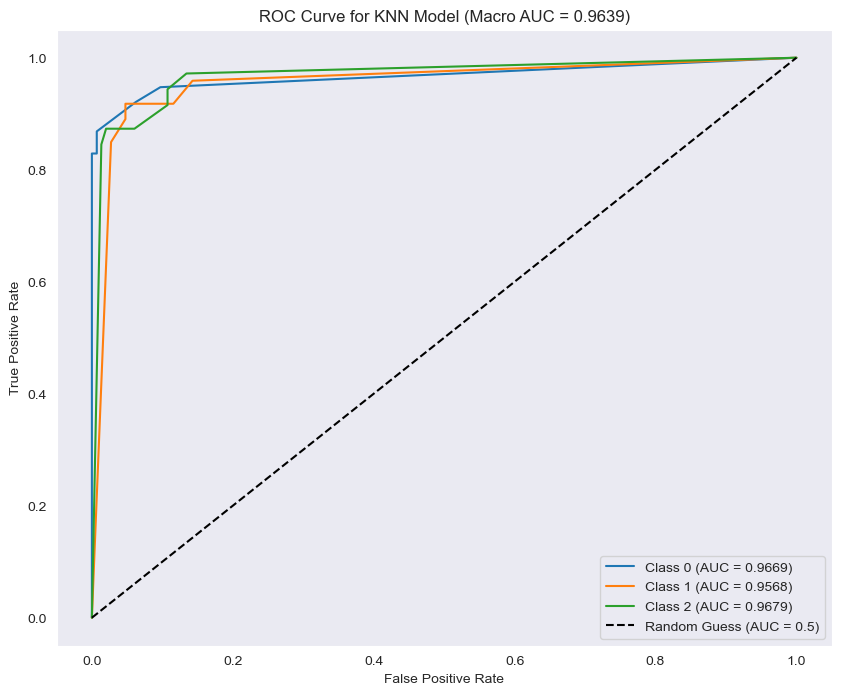

Per-class AUC Scores: {0: 0.966922514619883, 1: 0.9568073804864412, 2: 0.9679081198601002}
Macro-average AUC: 0.9639
Initializing KNN model completed
initializing datasource successfully!


/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


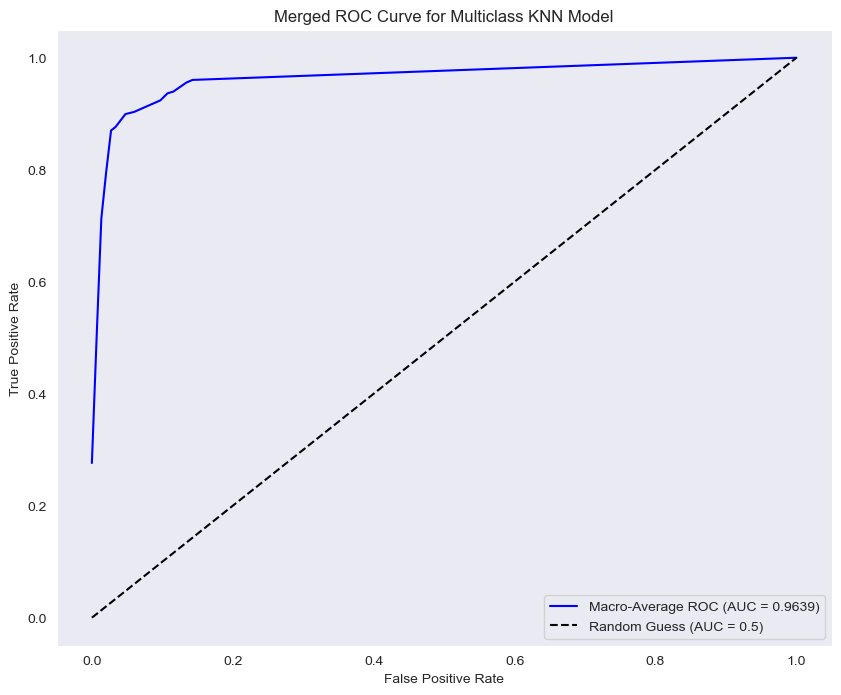

Macro-average AUC: 0.9639


In [16]:
KNN.KNNModel_test_with_seperate_roc()
KNN.KNNModel_test_with_merged_roc()

# Ensemble Model

/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


initializing datasource successfully!
Best Random Forest Accuracy: 0.895455

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        76
           1       0.95      0.85      0.90        73
           2       0.86      0.94      0.90        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



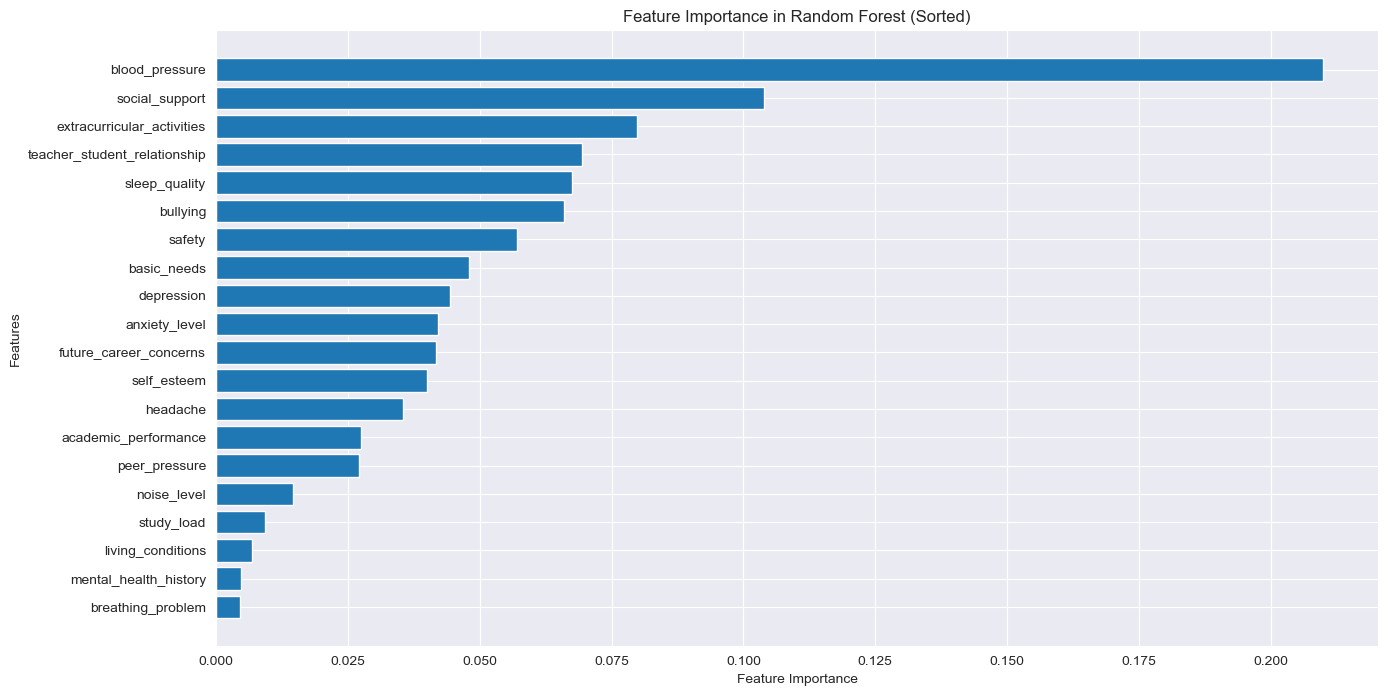

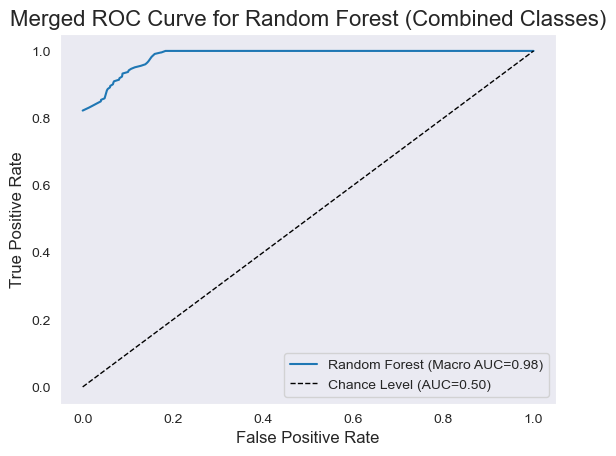

/Users/cyt/Coding/Python/DS_Project/Ensemble.py:125: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


Dropped columns due to high correlation: {'social_support'}
Best XGBoost Accuracy: 0.9045454545454545


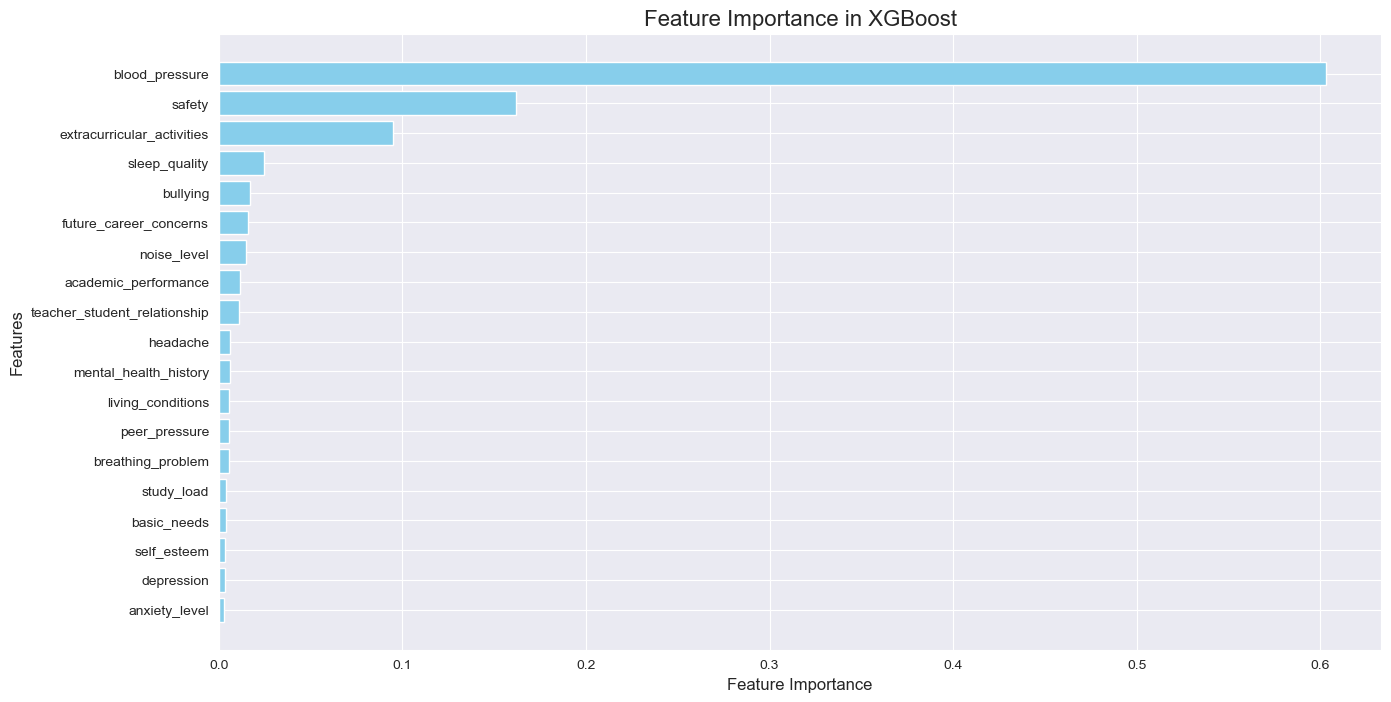

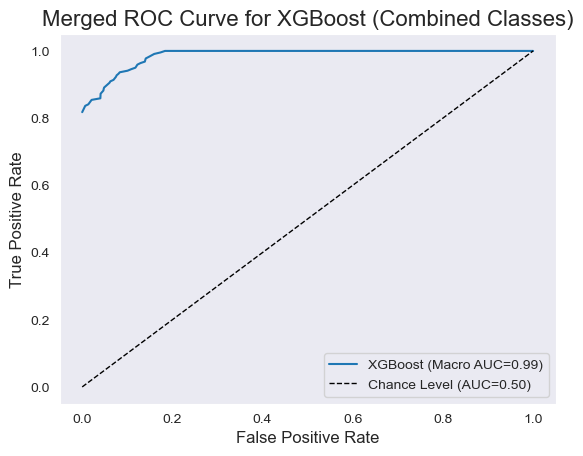

In [17]:
import Ensemble
Ensemble.Best_RandomForest_model()
Ensemble.Best_XGBoost_model()

# MLP Model

In [18]:
import MLP
MLP.load_and_evaluate_BestMLP_model('cpu')

initializing datasource successfully!
Accuracy of MLP on test set: 91.82%


/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


initializing datasource successfully!


/Users/cyt/Coding/Python/DS_Project/DataSource.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


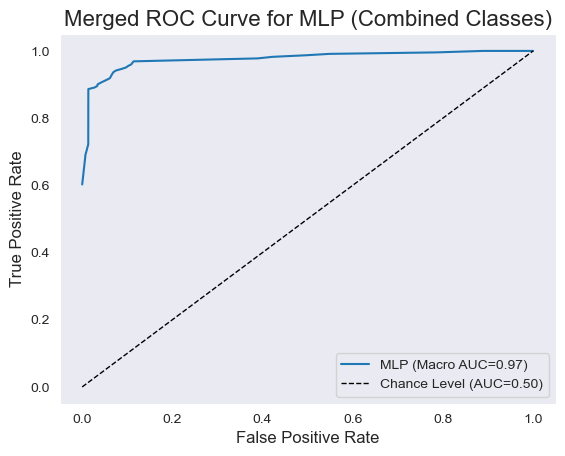

In [19]:
MLP.plot_roc_auc()